In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.utils import data_helpers

In [2]:
PREPROCESSED_FOLDER = "data/google_stocks/preprocessed"

df = pd.read_csv("data/google_stocks/stock_data.csv")
df_mean = df[["Open", "Close", "High", 'Low']].mean(axis=1)

df_mean.shape


<Axes: >

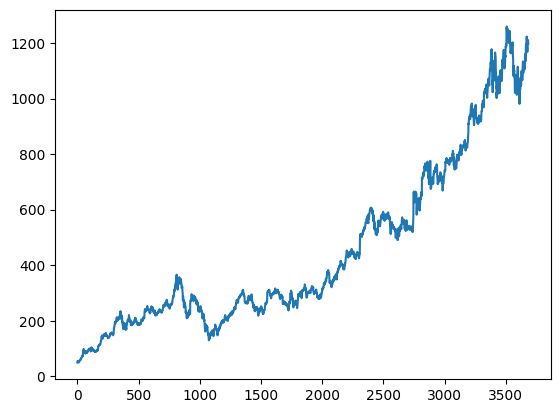

In [3]:
df_mean.plot()

In [4]:
df_normalized = data_helpers.standardize(df_mean)

<Axes: >

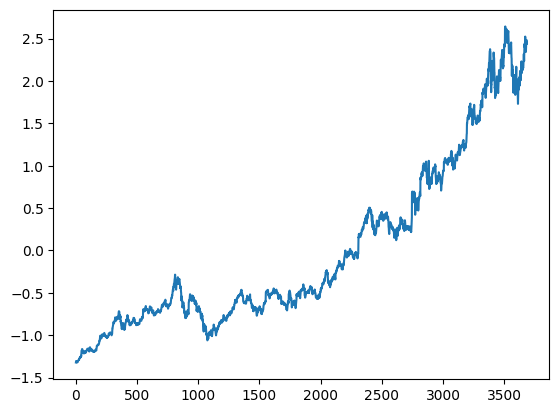

In [5]:
df_normalized.plot()

In [6]:
def train_test_split(dset:np.ndarray, train_size=0.7):
    shape = dset.shape
    train_idx = int(shape[0]*train_size)
    
    dset = dset.reshape((shape[0], 1, shape[-1])).astype(np.float32)
    
    train = dset[:train_idx]
    test = dset[train_idx:]
    
    return train, test 

In [7]:
def make_dataset(dset:np.ndarray):
    rng = np.random.default_rng()
    window_length = 30
    sequences = []
    
    for i in range(0, dset.shape[0]- window_length):
        sequence = dset[i: i+window_length]
        sequences.append(sequence)
        
    return rng.permutation(np.array(sequences))

In [8]:
# Plot Somme Sequences
def plot_several_sequence(dset, count):
    for i in range(count):
        fig = plt.figure(figsize=(18, 3))
        
        plt.plot(dset[i][0], '.-')
        plt.grid()
        plt.show()
        plt.close(fig)

### Make the in sample dataset.

In [9]:
style_dataset = make_dataset(df_normalized.values)

style_train, style_test= train_test_split(style_dataset)

np.save(f"{PREPROCESSED_FOLDER}/style_train.npy", style_train)
np.save(f"{PREPROCESSED_FOLDER}/style_test.npy", style_test)

## Make the "In Sample Dataset"

As said in the paper, this content dataset bahave in the same dataset. So, a Simple permutation is enough.

In [10]:
rng = np.random.default_rng() # Applying the new numpy Generator.

content_train = rng.permutation(style_train)
content_test = rng.permutation(style_test)

np.save(f"{PREPROCESSED_FOLDER}/in_sample_train.npy", content_train)
np.save(f"{PREPROCESSED_FOLDER}/in_sample_test.npy", content_test)

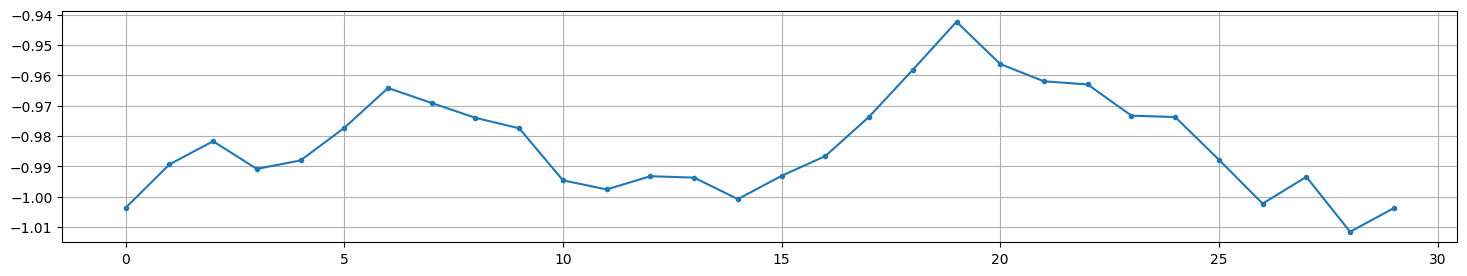

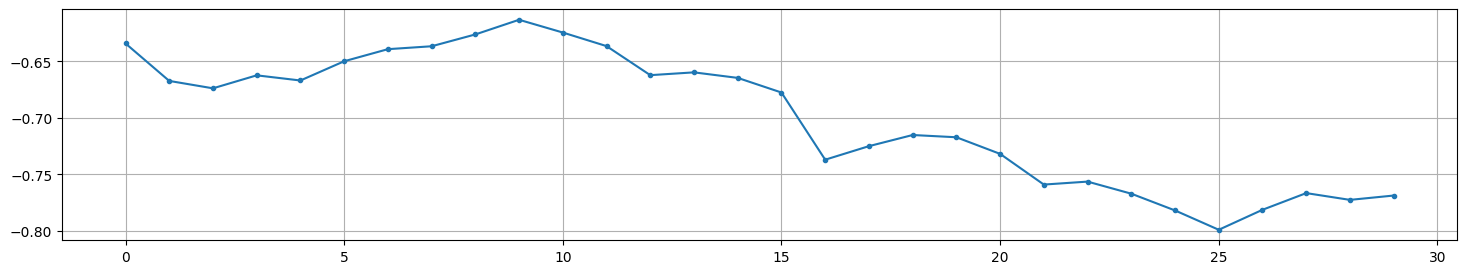

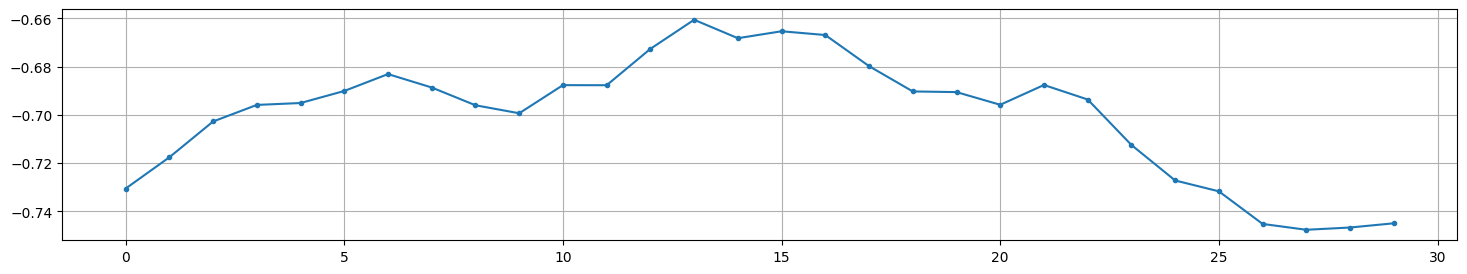

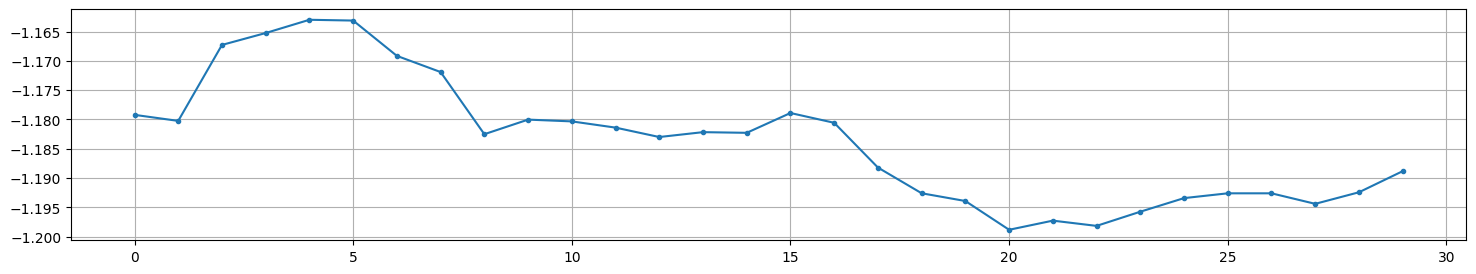

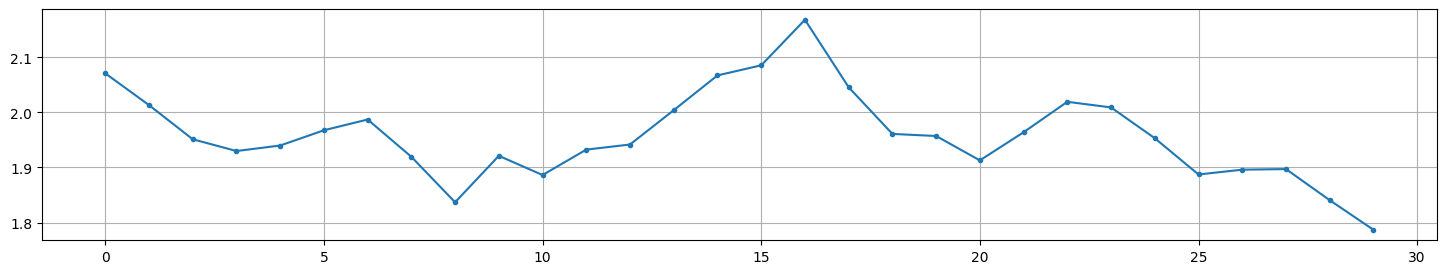

In [11]:
plot_several_sequence(content_train, 5)

## Make the "perturbed" Dataset.

The "Perturbed" Dataset a modification for the content part of the Style Time. 

"""
For example, one can add a randomly shifted and scaled unit-step function to each example in the training dataset. 
"""


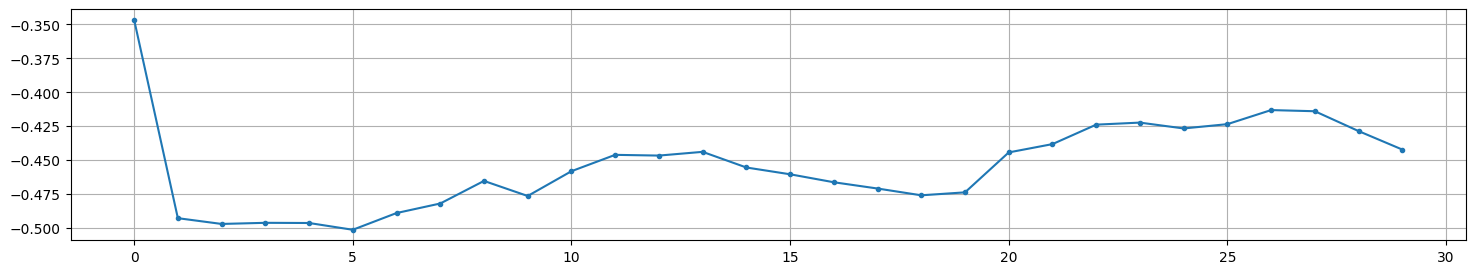

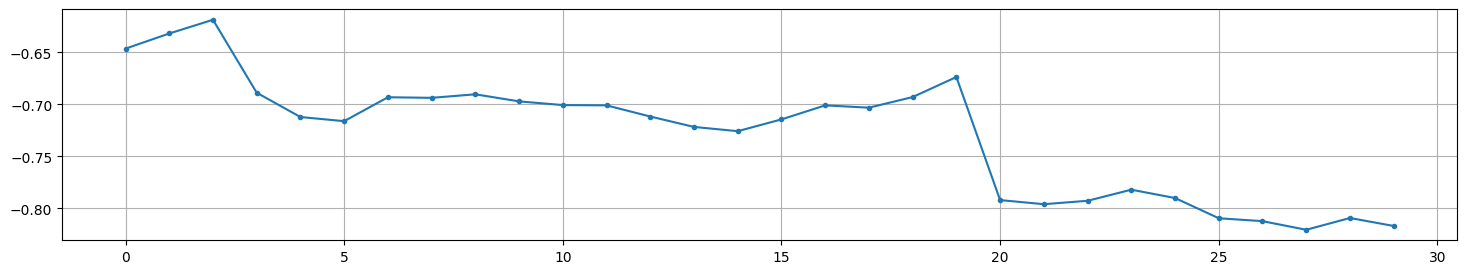

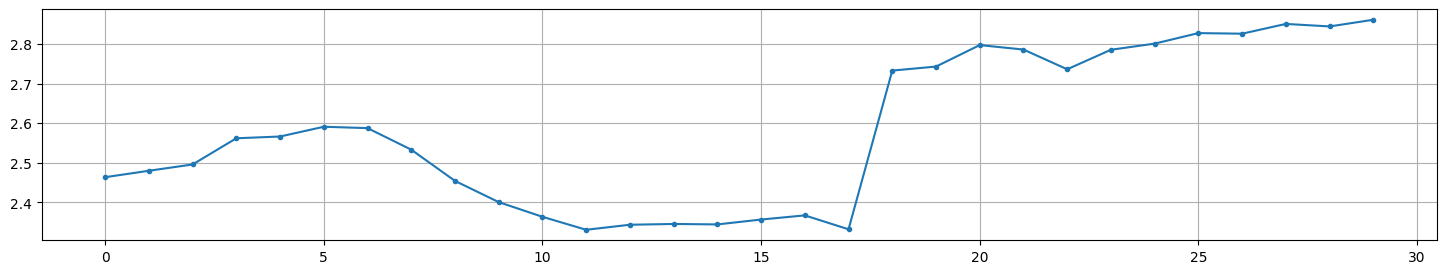

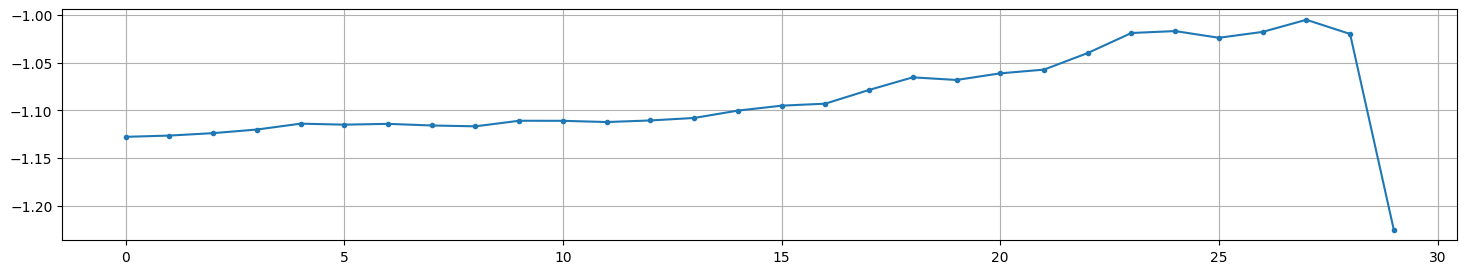

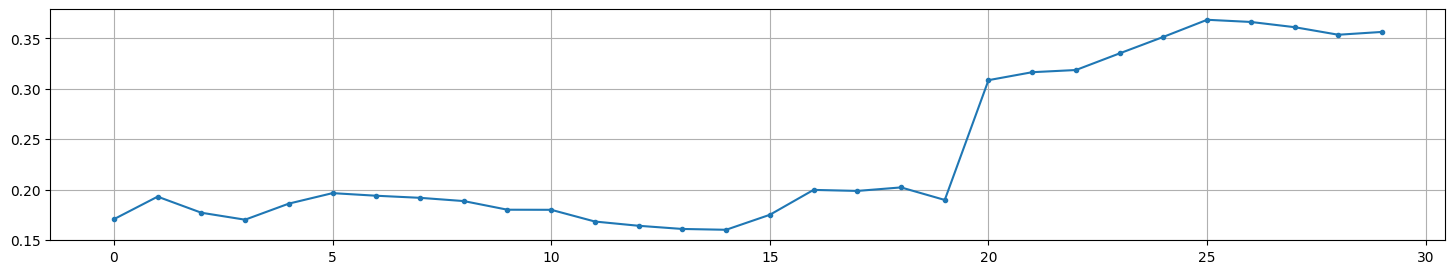

In [12]:
perturbed_train = data_helpers.make_perturbed_dataset(style_train)
perturbed_test = data_helpers.make_perturbed_dataset(style_test)

plot_several_sequence(perturbed_train, 5)

np.save(f"{PREPROCESSED_FOLDER}/perturbed_train.npy", perturbed_train)
np.save(f"{PREPROCESSED_FOLDER}/perturbed_test.npy", perturbed_test)